## urllib库

### 3.1.1 发送请求

In [2]:
import urllib.request

# urllib.request.urlopen('url')  # 访问一个网站，并获取相应
response = urllib.request.urlopen("https://www.python.org")  # <class 'http.client.HTTPResponse'>
print(response.read().decode('utf-8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

In [7]:
print(response.status)  # 获取状态码
print(response.getheaders())  # 获取响应头
print("-"*50)
print(response.getheader)
print(response.getheader('Server'))

200
[('Server', 'nginx'), ('Content-Type', 'text/html; charset=utf-8'), ('X-Frame-Options', 'DENY'), ('Via', '1.1 vegur'), ('Via', '1.1 varnish'), ('Content-Length', '48914'), ('Accept-Ranges', 'bytes'), ('Date', 'Mon, 16 Sep 2019 12:41:09 GMT'), ('Via', '1.1 varnish'), ('Age', '2080'), ('Connection', 'close'), ('X-Served-By', 'cache-iad2141-IAD, cache-hnd18721-HND'), ('X-Cache', 'HIT, HIT'), ('X-Cache-Hits', '1, 1946'), ('X-Timer', 'S1568637669.281700,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains')]
--------------------------------------------------
<bound method HTTPResponse.getheader of <http.client.HTTPResponse object at 0x000002C47E0DCB00>>
nginx


### 3.1.2 data 参数
传递了`data`参数后，请求方式不再是GET，而是`POST`。

In [13]:
import urllib.parse
data = bytes(urllib.parse.urlencode({'word':'hello'}), encoding='utf-8')

response = urllib.request.urlopen('http://httpbin.org/post', data=data)
print(response.read().decode())


{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "word": "hello"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "10", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.7"
  }, 
  "json": null, 
  "origin": "112.97.164.24, 112.97.164.24", 
  "url": "https://httpbin.org/post"
}



### 3.1.3 timeout参数
设置超时时间（单位：s），超时会抛出异常

In [22]:
import socket
import urllib.error
# response = urllib.request.urlopen('http://httpbin.org/get', timeout=0.1)
# print(response.read())

# 由于超时会抛出timeout异常，所以可以用try捕获异常

try:
    response = urllib.request.urlopen('http://httpbin.org/get', timeout=0.1)
except urllib.error.URLError as e:
    if isinstance(e.reason, socket.timeout): # socket.timeout类型(即超时异常)
        print("TIME OUT")
        print(e.reason, '----', socket.timeout)
        print(e)

TIME OUT
timed out ---- <class 'socket.timeout'>
<urlopen error timed out>


## 3.2 urllib.request.Request
用于加入headers等信息

**构造方法：**
```python
class Request:

    def __init__(self, url, data=None, headers={},
                 origin_req_host=None, unverifiable=False,
                 method=None):
```

1. url是必传参数，为请求的URL
2. data如果要传，必须是`bytes`类型的。如果是一个字典，先用urllib.parse.urlencode({})进行编码
`urllib.parse.urlencode({'a':'A'})`
3. headers必须是一个字典，可以用headers直接传入参数，也可以用add_header()方法添加

In [24]:
import urllib.request

# 构造http request， 可以传入headers={}等参数
request = urllib.request.Request('https://www.python.org')
# 将http request，传入urlopen（）就可以实现带参数打开网页
response = urllib.request.urlopen(request)
print(response.read().decode('utf-8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

﻿<!DOCTYPE html>
<html class=""><!--STATUS OK--><head><meta name="referrer" content="always" /><meta charset='utf-8' /><meta name="viewport" content="width=device-width,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no"/><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//m.baidu.com"/><link rel="shortcut icon" href="https://sm.bdimg.com/static/wiseindex/img/favicon64.ico" type="image/x-icon"><link rel="apple-touch-icon-precomposed" href="https://sm.bdimg.com/static/wiseindex/img/screen_icon_new.png"/><meta name="format-detection" content="telephone=no"/><noscript><style type="text/css">#page{display:none;}</style><meta http-equiv="refresh" content="0; URL=http://m.baidu.com/?cip=112.97.180.24&amp;baiduid=433DB4AAED0290A1196E65E26551F041&amp;from=844b&amp;vit=fps?from=844b&amp;vit=fps&amp;index=&amp;ssid=0&amp;bd_page_type=1&amp;logid=7703285339866411505&pu=sz%401321_480&t_noscript=jump" /></noscript><title>百度一下</title><script>window._performanceT
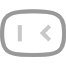
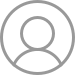
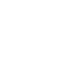
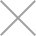
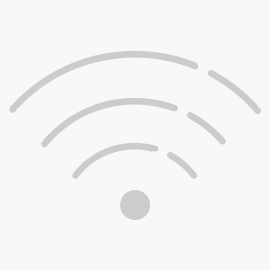
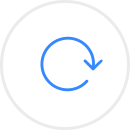
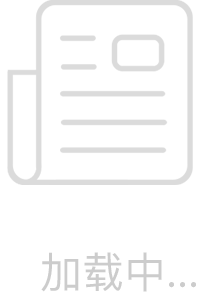
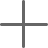
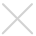
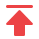
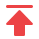
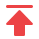
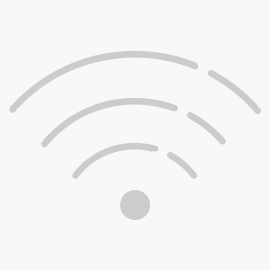
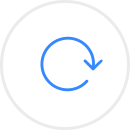

In [25]:
headers = {
    "Cookie": "BAIDUID=433DB4AAED0290A1196E65E26551F041:FG=1; BIDUPSID=433DB4AAED0290A1196E65E26551F041; PSTM=1560467964; BD_UPN=12314753; BDUSS=dnfn5zZnE3eHNlMkMwdjlLR3dUVH56WDR1OHhVQWY1UTBZZjFrSUhhMm9WM3RkRVFBQUFBJCQAAAAAAAAAAAEAAADTpYnPaHR3b28yMjIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKjKU12oylNdVT; H_WISE_SIDS=133994_124610_100805_135462_135311_134551_128065_133680_120155_135322_132909_131246_132439_130763_132378_131518_118882_118865_118855_118830_118798_107312_132783_134391_133352_132553_129655_132250_127025_134854_128967_133838_133847_132551_133287_134463_134320_129643_131423_135336_135552_134600_134489_110085_127969_131754_131951_135672_135458_127417_135045_135036_134383_135503_134353; locale=zh; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; COOKIE_SESSION=4444_2_8_9_9_30_0_2_6_6_73_12_0_0_468_77_1568552041_1568551650_1568556017%7C9%230_1_1568551573%7C1; yjs_js_security_passport=a27501ef9cdf21a57df86398c6685bdc89b800a4_1568592847_js; BAIDU_WISE_UID=wapp_1568616371161_183; BD_HOME=1; H_PS_PSSID=29654_1423_21087_29523_29521_29720_29567_29220_26350_22158",
    "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Version/11.0 Mobile/15A372 Safari/604.1"
}
request = urllib.request.Request('https://www.baidu.com', headers=headers)
response = urllib.request.urlopen(request)
print(response.read().decode('utf-8'))

In [30]:
from urllib import request, parse

url = "http://httpbin.org/post"
headers = {
    "Cookie": "BAIDUID=433DB4AAED0290A1196E65E26551F041:FG=1; BIDUPSID=433DB4AAED0290A1196E65E26551F041; PSTM=1560467964; BD_UPN=12314753; BDUSS=dnfn5zZnE3eHNlMkMwdjlLR3dUVH56WDR1OHhVQWY1UTBZZjFrSUhhMm9WM3RkRVFBQUFBJCQAAAAAAAAAAAEAAADTpYnPaHR3b28yMjIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKjKU12oylNdVT; H_WISE_SIDS=133994_124610_100805_135462_135311_134551_128065_133680_120155_135322_132909_131246_132439_130763_132378_131518_118882_118865_118855_118830_118798_107312_132783_134391_133352_132553_129655_132250_127025_134854_128967_133838_133847_132551_133287_134463_134320_129643_131423_135336_135552_134600_134489_110085_127969_131754_131951_135672_135458_127417_135045_135036_134383_135503_134353; locale=zh; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; COOKIE_SESSION=4444_2_8_9_9_30_0_2_6_6_73_12_0_0_468_77_1568552041_1568551650_1568556017%7C9%230_1_1568551573%7C1; yjs_js_security_passport=a27501ef9cdf21a57df86398c6685bdc89b800a4_1568592847_js; BAIDU_WISE_UID=wapp_1568616371161_183; BD_HOME=1; H_PS_PSSID=29654_1423_21087_29523_29521_29720_29567_29220_26350_22158",
    "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Version/11.0 Mobile/15A372 Safari/604.1",
    "Host":"httpbin.org"
}

dic ={"name":"John"}

data = bytes(parse.urlencode(dic), encoding='utf-8')

req = request.Request(url, headers=headers, data=data)
resp = request.urlopen(req)
print(resp.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "John"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Cookie": "BAIDUID=433DB4AAED0290A1196E65E26551F041:FG=1; BIDUPSID=433DB4AAED0290A1196E65E26551F041; PSTM=1560467964; BD_UPN=12314753; BDUSS=dnfn5zZnE3eHNlMkMwdjlLR3dUVH56WDR1OHhVQWY1UTBZZjFrSUhhMm9WM3RkRVFBQUFBJCQAAAAAAAAAAAEAAADTpYnPaHR3b28yMjIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKjKU12oylNdVT; H_WISE_SIDS=133994_124610_100805_135462_135311_134551_128065_133680_120155_135322_132909_131246_132439_130763_132378_131518_118882_118865_118855_118830_118798_107312_132783_134391_133352_132553_129655_132250_127025_134854_128967_133838_133847_132551_133287_134463_134320_129643_131423_135336_135552_134600_134489_110085_127969_131754_131951_135672_135458_127417_135045_135036_134383_135503_134353; locale=zh; BDORZ=B490B5EBF6F3CD402E515D22

## 3.3 高级用法

### 3.3.1 代理

In [35]:
from urllib.error import URLError
from urllib.request import ProxyHandler, build_opener

headers = {
    "Cookie": "BAIDUID=433DB4AAED0290A1196E65E26551F041:FG=1; BIDUPSID=433DB4AAED0290A1196E65E26551F041; PSTM=1560467964; BD_UPN=12314753; BDUSS=dnfn5zZnE3eHNlMkMwdjlLR3dUVH56WDR1OHhVQWY1UTBZZjFrSUhhMm9WM3RkRVFBQUFBJCQAAAAAAAAAAAEAAADTpYnPaHR3b28yMjIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKjKU12oylNdVT; H_WISE_SIDS=133994_124610_100805_135462_135311_134551_128065_133680_120155_135322_132909_131246_132439_130763_132378_131518_118882_118865_118855_118830_118798_107312_132783_134391_133352_132553_129655_132250_127025_134854_128967_133838_133847_132551_133287_134463_134320_129643_131423_135336_135552_134600_134489_110085_127969_131754_131951_135672_135458_127417_135045_135036_134383_135503_134353; locale=zh; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; COOKIE_SESSION=4444_2_8_9_9_30_0_2_6_6_73_12_0_0_468_77_1568552041_1568551650_1568556017%7C9%230_1_1568551573%7C1; yjs_js_security_passport=a27501ef9cdf21a57df86398c6685bdc89b800a4_1568592847_js; BAIDU_WISE_UID=wapp_1568616371161_183; BD_HOME=1; H_PS_PSSID=29654_1423_21087_29523_29521_29720_29567_29220_26350_22158",
    "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Version/11.0 Mobile/15A372 Safari/604.1",
}

proxy_handler = ProxyHandler({
    "http":"http://119.41.236.180:8010",
    "https":"https://47.102.216.176:3128"
})

opener = build_opener(proxy_handler)
try:
    response = opener.open('https://www.baidu.com')
    print(response.read().decode('utf-8'))
except URLError as e:
    print(e.reason)
    

<html>
<head>
	<script>
		location.replace(location.href.replace("https://","http://"));
	</script>
</head>
<body>
	<noscript><meta http-equiv="refresh" content="0;url=http://www.baidu.com/"></noscript>
</body>
</html>


### 3.3.2 cookie


In [40]:
import http.cookiejar, urllib.request

cookie = http.cookiejar.CookieJar()
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open('https://www,python.com')
for item in cookie:
    print(item.name + "=" + item.value)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

## 3.4 异常处理

### 3.4.1 URLError

URLError类来自urllib库的 error模块， 它继承自OSError类，
是error异常模块的基类， 由request模块生的的异常都可以捕获这个类处理

In [57]:
from urllib import request, error

try:
    response = request.urlopen('http://jwc.dgut.edu.cn/dsad.html')
except error.URLError as e:
    print(e.reason)

Not Found


### 3.4.2 HTTPError
它是URLError的字类，专门用于处理html请求错误。它有3个属性
+ code：返回HTTP状态码
+ reason：返回错误原因
+ headers：返回请求头

In [58]:
from urllib import request, error

try:
    response = request.urlopen("http://jwc.dgut.edu.cn/dsad.html")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

404 Not Found Content-Type: text/html
Expires: 0
Cache-control: private
Content-Length: 1841




**由于HTTPError是URLError的子类， 所以可以先捕获HTTPError，再捕获URLErroryc**


In [60]:
from urllib import request, error

try:
    response = request.urlopen("http://jwc.dgut.edu.cn/dsad.html")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
except error.URLError as e:
    print(e.reason)
else:
    print('Sucessfully!')
    

404 Not Found Content-Type: text/html
Expires: 0
Cache-control: private
Content-Length: 1841




**有时候reason返回的并不一定是字符串，也有可能是对象**

In [64]:
import socket
import urllib.request
import urllib.error

try:
    response = urllib.request.urlopen('https://www.python.org', timeout=0.01)
except urllib.error.URLError as e:
    if isinstance(e.reason, socket.timeout):
        print(type(e.reason))
        print('TIME OUT!!!')

<class 'socket.timeout'>
TIME OUT!!!


## 3.5 解析链接

### 3.5.1 urlparse()

**将网站进行解析，拆分成6个部分** 
<br>
schme：协议，netloc：域名，path：路径，params：参数，query：查询条件，fragment：瞄点

In [7]:
from urllib.parse import urlparse

result = urlparse('https://www.baidu.com/index.html;user?id=5#comment') # 可以同result.xxx 进行访问
print(type(result), '\n', result)

<class 'urllib.parse.ParseResult'> 
 ParseResult(scheme='https', netloc='www.baidu.com', path='/index.html', params='user', query='id=5', fragment='comment')


### 3.5.2 urlunparse()
**反解析**

In [10]:
from urllib.parse import urlunparse

data = ['https', 'www.baidu.com','index.html', 'user', 'id=6','comment']
print(urlunparse(data))

https://www.baidu.com/index.html;user?id=6#comment


### 3.5.3urlsplit()
和urlparse相似，但只返回5个结果
<br>
它把params和query合并到一起

In [14]:
from urllib.parse import urlsplit
result = urlsplit('https://www.baidu.com/index.html;user?id=5#comment') 
print(result)

SplitResult(scheme='https', netloc='www.baidu.com', path='/index.html;user', query='id=5', fragment='comment')


### 3.5.4urlencode()
-- 能把字典转换成key=value的url字符串<br>
用于构造GET请求时的参数

In [17]:
from urllib.parse import urlencode
params = {
    'name':'John',
    'age':22
}

base_url = 'https://www.baidu.com?'
url = base_url + urlencode(params)
print(url)

https://www.baidu.com?name=John&age=22



### 3.5.5 parse_qs()
-- 将key=value的url字符串转换成字典


In [22]:
import urllib.parse

query = 'name=John&age=22'
result = urllib.parse.parse_qs(query)
print(result)

{'name': ['John'], 'age': ['22']}


### 3.5.6parse_qsl()
--与上面方法类型，只是转换成列表

In [26]:
query = 'name=John&age=22'
result = urllib.parse.parse_qsl(query)
print(result)
print(type(result))

[('name', 'John'), ('age', '22')]
<class 'list'>


### 3.5.7quote()
-- 进行URL编码

In [29]:
url = 'https://www.baidu.com/s?wd=' + urllib.parse.quote('你好')
print(url)

https://www.baidu.com/s?wd=%E4%BD%A0%E5%A5%BD


### 3.5.8 unquote()
-- 进行URL解码

In [32]:
print(urllib.parse.unquote(url))

https://www.baidu.com/s?wd=你好
